In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('datasets_23663_30246_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.shape

(2000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

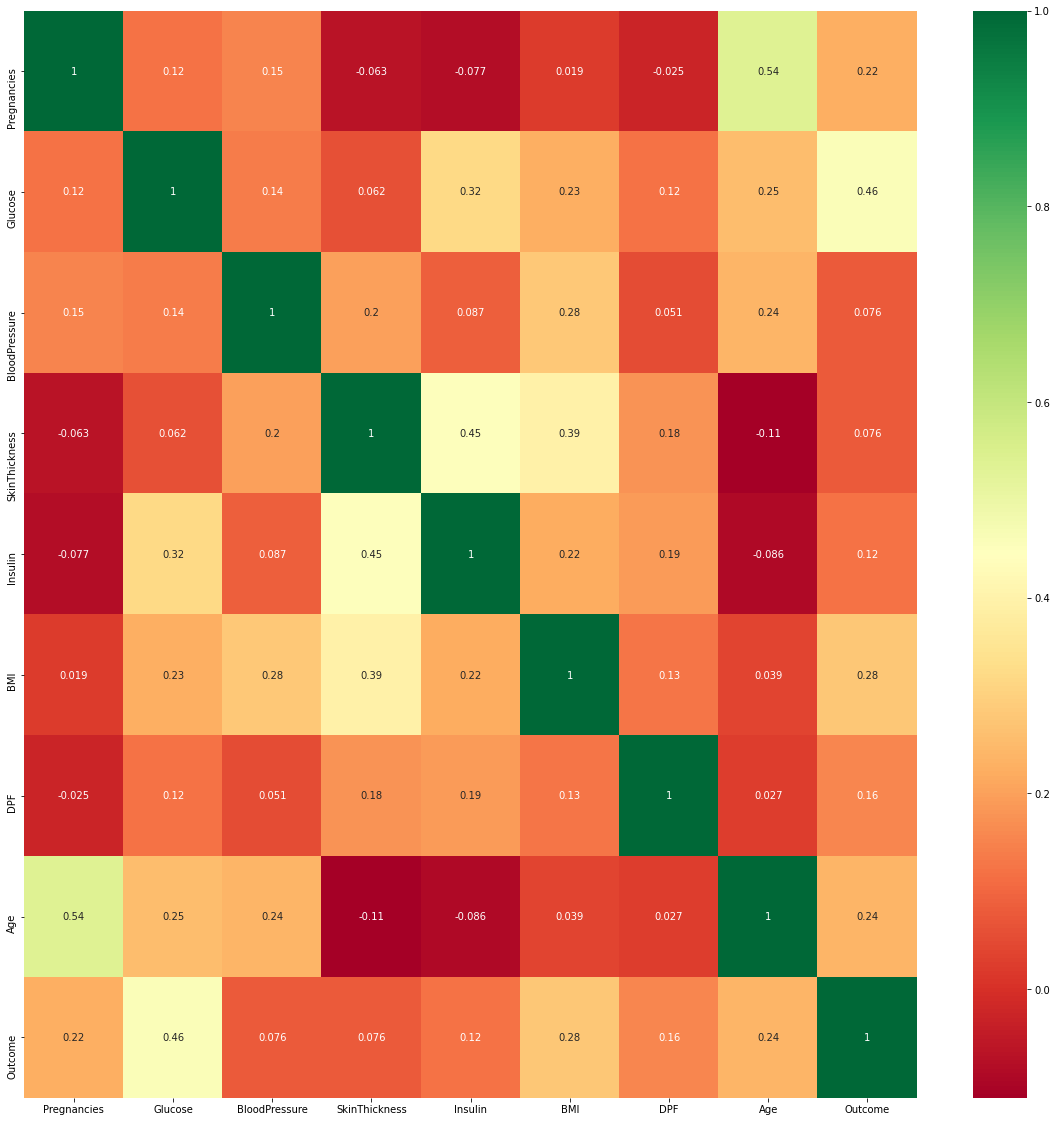

In [7]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DPF,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [9]:
threshold=0.5

def correlation(dataset,threshold):
    corr_set=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                corr_set.add(corr_matrix.columns[i])
    return corr_set           

In [10]:
correlation(df.iloc[:,:-1],threshold)

{'Age'}

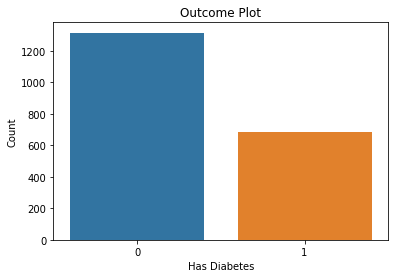

In [11]:
sns.countplot(x='Outcome',data=df)
plt.title('Outcome Plot')
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

In [12]:
# Replacing NaN value by mean, median depending upon distribution
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

C:\Users\Dishaa\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Dishaa\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Dishaa\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Dishaa\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecatio

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AE449A1D0>,
      dtype=object)

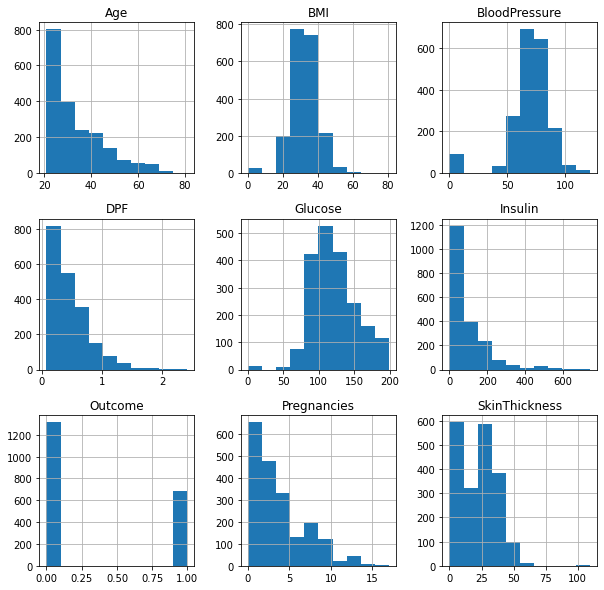

In [13]:
df.hist(figsize=(10,10))

### Feature Selection

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [16]:
#Select the top Features based on chi sq test

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feature_rank=SelectKBest(chi2, k=5)
feature_data=feature_rank.fit(X, y)


In [17]:
top_features=pd.DataFrame(feature_data.scores_,columns=['Score'])
df_columns=pd.DataFrame(X.columns)
feature_score=pd.concat([df_columns,top_features],axis=1)
feature_score.columns=['Feature','Score']

In [18]:
feature_score

,Feature,Score
0,Pregnancies,297.174531
1,Glucose,3565.032017
2,BloodPressure,61.414446
3,SkinThickness,143.170504
4,Insulin,4502.211646
5,BMI,315.830787
6,DPF,10.739357
7,Age,469.428843


In [19]:
feature_score.nlargest(5,'Score')

,Feature,Score
4,Insulin,4502.211646
1,Glucose,3565.032017
7,Age,469.428843
5,BMI,315.830787
0,Pregnancies,297.174531


### Feature Importance 



#### Extra Classifier tree

This technique gives you a score for each feature of your data,the higher the score more relevant it is

In [20]:
from sklearn.ensemble import ExtraTreesClassifier


model=ExtraTreesClassifier()
model.fit(X,y)

C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [21]:
model.feature_importances_

array([0.10263424, 0.2596684 , 0.09557331, 0.07818605, 0.07780548,
       0.13896068, 0.12167446, 0.12549739])

In [22]:
rank_fearure=pd.Series(model.feature_importances_,index=X.columns)

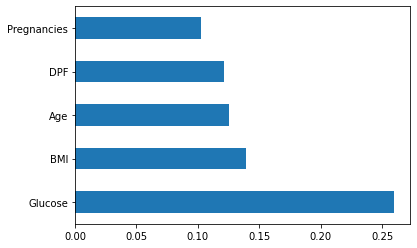

In [23]:
rank_fearure.nlargest(5).plot(kind='barh')

### Model Building 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [25]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Random Forest  

In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=20, random_state=0)


In [27]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

paras={'n_estimators':[10,15,20,50,100,200],'max_features':[1,2,3,5,6,7],'max_depth':[4,5,6,7,3]}
random_search=RandomizedSearchCV(random_forest_model,param_distributions=paras,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=20,
                                                    n_jobs=None,
  

In [28]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
random_search.best_score_

0.9240919529550287

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False), X_train, y_train, cv=5)

In [31]:
print('The Average Score from Random Forest is : {}'.format(round(sum(scores)/len(scores)*100),3))

The Average Score from Random Forest is : 86.0


In [32]:
random_forest_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##### XgBoost 

In [34]:
import xgboost

xg=xgboost.XGBClassifier()

In [35]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


xg_search=RandomizedSearchCV(xg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
xg_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.8s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'co

In [36]:
xg_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
xg=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
scores = cross_val_score(xg, X_train, y_train, cv=5)

In [39]:
print('The Average Score from Random Forest is : {}'.format(round(sum(scores)/len(scores)*100),3))

The Average Score from Random Forest is : 95.0


In [40]:
xg=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Model Evaluation 

#### Test Data

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#ConfusionMatrix 

pred=random_forest_model.predict(X_test)

cm = confusion_matrix(y_test, pred)
cm

array([[263,   9],
       [ 18, 110]], dtype=int64)

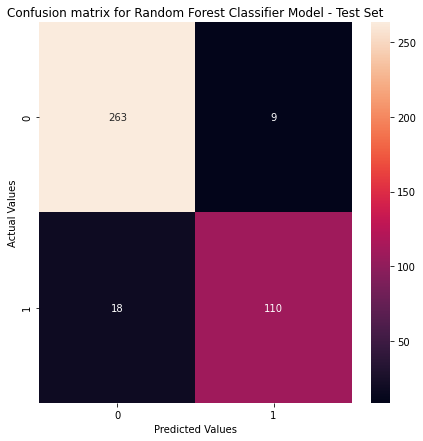

In [43]:
# Plotting the confusion matrix
plt.figure(figsize=(7,7))
p = sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [44]:
# Accuracy Score
score = round(accuracy_score(y_test, pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 93.25%


In [45]:
# Classification Report

c_report = classification_report(y_test, pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       272
           1       0.92      0.86      0.89       128

    accuracy                           0.93       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.93      0.93      0.93       400



#### Train Data 

In [46]:
# Confusion Matrix

train_pred=random_forest_model.predict(X_train)

cm = confusion_matrix(y_train, train_pred)
cm

array([[1022,   22],
       [  45,  511]], dtype=int64)

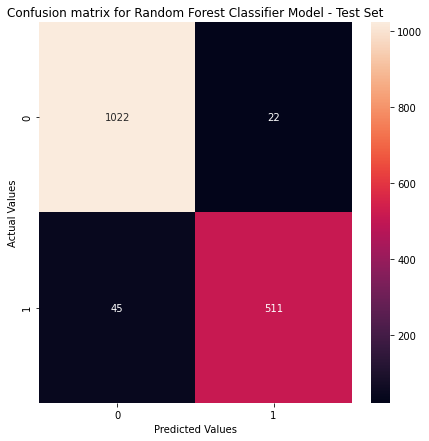

In [47]:
# Plotting the confusion matrix
plt.figure(figsize=(7,7))
p = sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [48]:
# Accuracy Score
score = round(accuracy_score(y_train, train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 95.81%


In [49]:
# Classification Report
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1044
           1       0.96      0.92      0.94       556

    accuracy                           0.96      1600
   macro avg       0.96      0.95      0.95      1600
weighted avg       0.96      0.96      0.96      1600



### Prediction 

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
Pregnancies      2000 non-null int64
Glucose          2000 non-null int64
BloodPressure    2000 non-null int64
SkinThickness    2000 non-null int64
Insulin          2000 non-null int64
BMI              2000 non-null float64
DPF              2000 non-null float64
Age              2000 non-null int64
dtypes: float64(2), int64(6)
memory usage: 125.1 KB


In [51]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)
    
    x=[[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x=sc.transform(x)
    return random_forest_model.predict(x)

In [52]:
p=predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]

if p:
    print('Sorry ! You have Diabetes')
else:
    print('Congratulations!! you do not have Diabetes')

Congratulations!! you do not have Diabetes


In [53]:
p = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]

if p:
    print('Sorry ! You have Diabetes')
else:
    print('Congratulations!! you do not have Diabetes')

Sorry ! You have Diabetes


### Pickling 

In [54]:
import pickle
# open a file, where you ant to store the data
file = open('random_classification_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest_model, file)